# 1. Model Capacity
- import Packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- pandas DataFrame
   - 'Electric.csv' From github

In [ ]:
elec = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv')
elec.info()
# 전력사용량 자료 
# 768행 9열, null 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [ ]:
elec.head()

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,155.5
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,155.5
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,155.5
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,155.5
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,208.4


- 산점도(surface_area vs. electricity)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


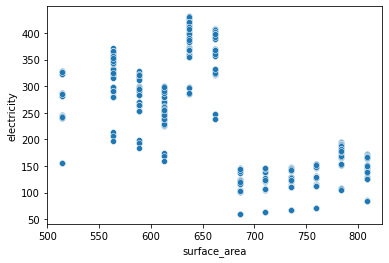

In [ ]:
sns.scatterplot(elec['surface_area'], elec['electricity'])
plt.show()
# 바닥면적(surface_area)에 따른 전력사용량(electricity)

> ## 1) 1차 모델 시각화

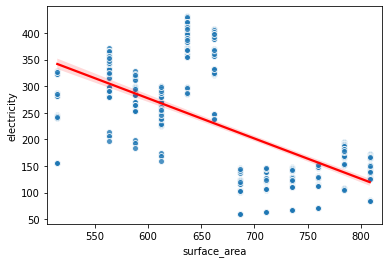

In [ ]:
sns.regplot(x = 'surface_area', y = 'electricity', data = elec,
            line_kws = {'color': 'red'},
            scatter_kws = {'edgecolor': 'white'})
plt.xlim(505, 820) # x축 범위
plt.show()

> ## 2) 2차 모델 시각화

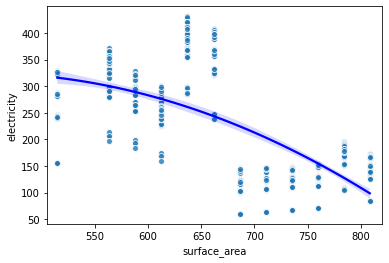

In [ ]:
sns.regplot(x = 'surface_area', y = 'electricity', data = elec,
            line_kws = {'color': 'blue'},
            scatter_kws = {'edgecolor': 'white'},
            order = 2) # 2차 함수
plt.xlim(505, 820) 
plt.show()

> ## 3) 5차 모델 시각화

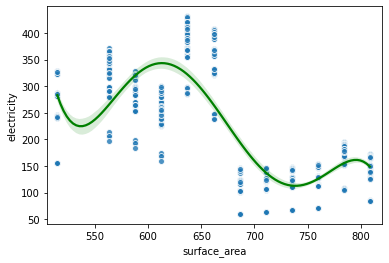

In [ ]:
sns.regplot(x = 'surface_area', y = 'electricity', data = elec,
            line_kws = {'color': 'green'},
            scatter_kws = {'edgecolor': 'white'},
            order = 5)
plt.xlim(505, 820) 
plt.show()

> ## 4) 9차 모델 시각화

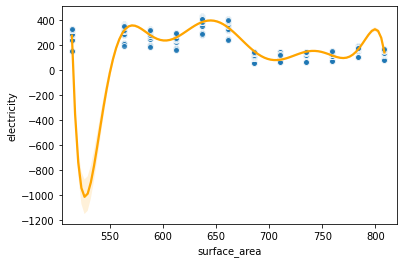

In [ ]:
sns.regplot(x = 'surface_area', y = 'electricity', data = elec,
            line_kws = {'color': 'orange'},
            scatter_kws = {'edgecolor': 'white'},
            order = 9)
plt.xlim(505, 820) 
plt.show()

> ## 5) 4개 모델 비교 시각화

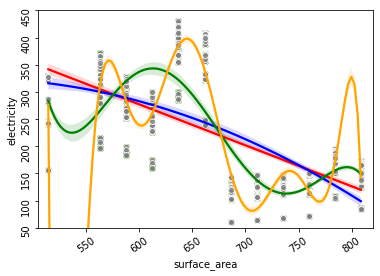

In [ ]:
sns.regplot(x = 'surface_area', y = 'electricity', data = elec, line_kws = {'color': 'red'})
sns.regplot(x = 'surface_area', y = 'electricity', data = elec, line_kws = {'color': 'blue'},order = 2)
sns.regplot(x = 'surface_area', y = 'electricity', data = elec, line_kws = {'color': 'green'},order = 5)
sns.regplot(x = 'surface_area', y = 'electricity', data = elec, line_kws = {'color': 'orange'},order = 9,
          scatter_kws = {'color' : 'gray', 'edgecolor' : 'white'})
plt.xlim(505, 820)
plt.ylim(50, 450)
plt.xticks(rotation = 35)
plt.yticks(rotation = 90)
plt.show()
# 4개의 모델 중 어떤 모델이 오차가 가장 작은지 찾아야 한다.

> ## 6) ipywidgets Package

- reg_plot( ) 선언

In [ ]:
def reg_plot(x):
  sns.regplot(x = 'surface_area',
              y = 'electricity',
              data = elec,
              order = x,
              line_kws = {'color':'red'},
              scatter_kws = {'edgecolor':'white'})
  plt.xlim(505, 820)
  plt.ylim(50, 450)
  plt.show()

- interact( ) 실행

In [ ]:
from ipywidgets import interact
order = [1, 2, 5, 9]
interact(reg_plot, x = order)

interactive(children=(Dropdown(description='x', options=(1, 2, 5, 9), value=1), Output()), _dom_classes=('widg…

<function __main__.reg_plot>

# 2. Training Error
- import Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- pandas DataFrame
   - 'Electric.csv' From github

In [ ]:
elec = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv')
elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


> ## 1) 1차 모델 Training Error

- X_train and y_train

In [ ]:
X_train = elec[['surface_area']]
y_train = elec['electricity']

X_train.shape, y_train.shape
# X, y 모두 768행

((768, 1), (768,))

- 모델 생성

In [ ]:
from sklearn.linear_model import LinearRegression

model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- 모델 정보(학습결과) 확인

In [ ]:
print(model_1.coef_)
print(model_1.intercept_)
# coef : w값
# intercept : b값 

[-0.75387157]
729.4538243006992


- y_hat(예측값) 생성

In [ ]:
y_hat_1 = model_1.predict(X_train)
len(y_hat_1)
# 768개 예측

768

= MSE(Mean Squared Error) 계산

In [ ]:
tr_err_1 = np.mean((y_train - y_hat_1) ** 2)
tr_err_1
# tr_err_1 : 1차 MSE = 5763.xx 

5763.983779426347

> ## 2) 5차 모델 Training Error

- X 다항차수 변환
   - (768, 1) to (768, 5) 
   

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 5, include_bias = False) # degree : 5차로 추가
px_5 = poly.fit_transform(X_train)
px_5

array([[5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       [5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       [5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       ...,
       [8.08500000e+02, 6.53672250e+05, 5.28494014e+08, 4.27287410e+11,
        3.45461871e+14],
       [8.08500000e+02, 6.53672250e+05, 5.28494014e+08, 4.27287410e+11,
        3.45461871e+14],
       [8.08500000e+02, 6.53672250e+05, 5.28494014e+08, 4.27287410e+11,
        3.45461871e+14]])

In [ ]:
X_train.shape, px_5.shape
# 1차 함수 : y = w*X + b
# 5차 함수 : y = w1*X^5 + w2*X^4 + w3*X^3 + w4*X^2 + w5*X + b 

((768, 1), (768, 5))

- 5차 모델 생성

In [ ]:
from sklearn.linear_model import LinearRegression

model_5 = LinearRegression()
model_5.fit(px_5, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- 모델 정보(학습결과) 확인

In [ ]:
np.set_printoptions(suppress = True, precision = 10)

print(model_5.coef_)
print(model_5.intercept_)
# coef : w1~w5 
# intercept : b

[-0.0003155148 -0.1029296835  0.0003787616 -0.0000005032  0.0000000002]
2906.221625380881


- y_hat(예측값) 생성

In [ ]:
px_5_pred = poly.fit_transform(X_train)
y_hat_5 = model_5.predict(px_5_pred)
y_hat_5.shape

(768,)

- MSE(Mean Squared Error) 계산

In [ ]:
tr_err_5 = np.mean((y_train - y_hat_5) ** 2)
tr_err_5

4177.726328606075

> ## 3) 9차 모델 Training Error

- X 다항차수 변환
   - (768, 1) to (768, 9)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 9, include_bias = False) # degree : 9차로 추가
px_9 = poly.fit_transform(X_train)

In [ ]:
X_train.shape, px_9.shape
# 1차 함수 : y = w*X + b
# 9차 함수 : y = w1*X^9 + w2*X^8 + w3*X^7 ~ w4*X^2 + w5*X + b 

((768, 1), (768, 9))

- 모델 생성

In [ ]:
from sklearn.linear_model import LinearRegression

model_9 = LinearRegression()
model_9.fit(px_9, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- 모델 정보(학습결과) 확인

In [ ]:
print(model_9.coef_)
print(model_9.intercept_)
# coef : w1~w9
# intercept : b

[ 0.  0.  0.  0.  0.  0. -0.  0. -0.]
-440.08258373871365


- y_hat(예측값) 생성

In [ ]:
px_9_pred = poly.fit_transform(X_train)
y_hat_9 = model_9.predict(px_9_pred)
y_hat_9.shape

(768,)

- MSE(Mean Squared Error) 계산

In [ ]:
tr_err_9 = np.mean((y_train - y_hat_9) ** 2)
tr_err_9

4086.7199908150374

> ## 4) 3개 모델 Training Error 비교

In [ ]:
print('1차 모델: ', tr_err_1)
print('5차 모델: ', tr_err_5)
print('9차 모델: ', tr_err_9)
# 9차 모델의 MSE가 가장 작음을 알 수 있다

1차 모델:  5763.983779426347
5차 모델:  4177.726328606075
9차 모델:  4086.7199908150374


> ## 5) 잔차(Residual) 시각화

- 1차 모델

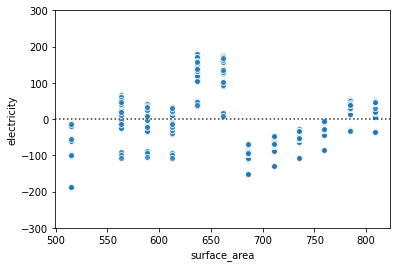

In [ ]:
sns.residplot(x = 'surface_area',
              y = 'electricity',
              data = elec,
              order = 1,
              scatter_kws = {'edgecolor':'white'})
plt.ylim(-300, 300)
plt.show()

- 5차 모델

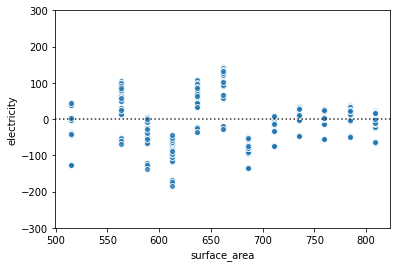

In [ ]:
sns.residplot(x = 'surface_area',
              y = 'electricity',
              data = elec,
              order = 5,
              scatter_kws = {'edgecolor':'white'})
plt.ylim(-300, 300)
plt.show()

- 9차 모델

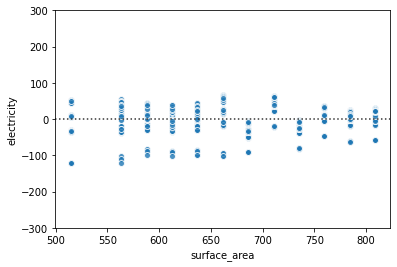

In [ ]:
sns.residplot(x = 'surface_area',
              y = 'electricity',
              data = elec,
              order = 9,
              scatter_kws = {'edgecolor':'white'})
plt.ylim(-300, 300)
plt.show()
# 잔차 주변에 가장 정렬이 잘 되어 있는 것을 알 수 있다 = 오차가 작다

# 3. Testing Error
- import Packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

- pandas DataFrame
   - 'Electric.csv' From github

In [ ]:
elec = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv')
elec.shape

(768, 9)

> ## Train_Data vs. Test_Data

### (1) DataFrame Split
- 8:2 Split(614:154)
- 80% Train_df & 20% Test_df

In [ ]:
from sklearn.model_selection import train_test_split
TR_elec, TE_elec = train_test_split(elec, test_size = 0.2, random_state = 2045)
# 전체 데이터 중 TR_elec : TE_elec = 8 : 2 
# random_state : 실험할 때마다 random data가 들어가지 않도록 설정

In [ ]:
TR_elec.shape, TE_elec.shape
# 768을 쪼개서 614 : 154

((614, 9), (154, 9))

- 80% TR_elec DataFrame

In [ ]:
TR_elec.head()

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
555,0.74,686.0,245.0,220.5,3.5,5,0.40,1,145.5
355,0.79,637.0,343.0,147.0,7.0,5,0.25,2,389.8
200,0.86,588.0,294.0,147.0,7.0,2,0.10,4,264.4
669,0.62,808.5,367.5,220.5,3.5,3,0.40,3,163.5
561,0.69,735.0,294.0,220.5,3.5,3,0.40,1,147.0


- 20% TE_elec DataFrame

In [ ]:
TE_elec.head()

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
414,0.71,710.5,269.5,220.50,3.5,4,0.25,3,121.0
475,0.64,784.0,343.0,220.50,3.5,5,0.25,4,166.2
511,0.71,710.5,269.5,220.50,3.5,5,0.25,5,122.7
213,0.76,661.5,416.5,122.50,7.0,3,0.10,4,323.8
339,0.98,514.5,294.0,110.25,7.0,5,0.25,2,286.0


### (2) Array Split

- X_train, X_test & y_train, y_test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(elec[['surface_area']], elec['electricity'],
                                                    test_size = 0.2, random_state = 2045)
# x변수가 train, test로 쪼개지고, y변수가 train, test로 쪼개진다.
# 비율은 train : test = 8 : 2                                                                            

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((614, 1), (154, 1), (614,), (154,))

- 80% X_train Array

In [ ]:
X_train.head()
# TR_elec.head()와 같음을 알 수 있다. random_state = 2045을 썼기 때문에 데이터 랜덤화 x

,surface_area
555,686.0
355,637.0
200,588.0
669,808.5
561,735.0


- 20% X_test Array

In [ ]:
X_test.head()
# TE_elec.head()와 같음을 알 수 있다.

,surface_area
414,710.5
475,784.0
511,710.5
213,661.5
339,514.5


- 80% y_train Array

In [ ]:
y_train.head()
# TR_elec.head()와 같음을 알 수 있다.

555    145.5
355    389.8
200    264.4
669    163.5
561    147.0
Name: electricity, dtype: float64

- 20% y_test Array

In [ ]:
y_test.head()
# TE_elec.head()와 같음을 알 수 있다.

414    121.0
475    166.2
511    122.7
213    323.8
339    286.0
Name: electricity, dtype: float64

### (3) Distribution Visualization : 잘 나눠졌는지 시각화로 확인

- Train Data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


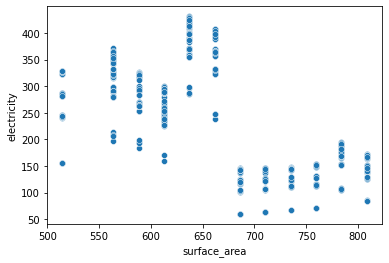

In [ ]:
sns.scatterplot(TR_elec['surface_area'], TR_elec['electricity'])
plt.show()

- Test Data


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


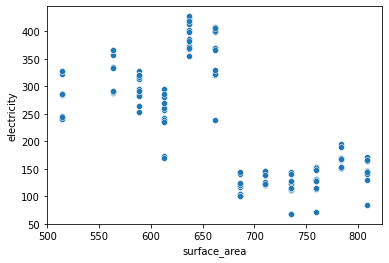

In [ ]:
sns.scatterplot(TE_elec['surface_area'], TE_elec['electricity'])
plt.show()
# 위의 Train Data와 분포가 비슷함을 알 수 있다
# 잘 나눠졌다

> ## 1) 1차 모델 Testing Error

- Train_Data로 모델 생성

In [ ]:
from sklearn.linear_model import LinearRegression

model_1 = LinearRegression()
model_1.fit(X_train, y_train)
# fit할 때는 Train Data 사용

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- Test_Data로 y_hat(예측값) 생성

In [ ]:
y_hat_1 = model_1.predict(X_test)
y_hat_1.shape
# 예측할 때는 Test Data 사용

(154,)

- Test_Data로 MSE(Mean Squared Error) 계산

In [ ]:
from sklearn.metrics import mean_squared_error
TE_err_1 = mean_squared_error(y_test, y_hat_1)
TE_err_1

6044.176547629271

> ## 2) 5차 모델 Testing Error

- Train_Data로 모델 생성

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 5, include_bias = False) 
px_5_TR = poly.fit_transform(X_train)
# 5차 모델은 다항 함수이기 때문에 본 셀과 같은 과정 필요

In [ ]:
from sklearn.linear_model import LinearRegression

model_5 = LinearRegression()
model_5.fit(px_5_TR, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- Test_Data로 y_hat(예측값) 생성

In [ ]:
px_5_TE = poly.fit_transform(X_test)
y_hat_5 = model_5.predict(px_5_TE)

- Test_Data로 MSE(Mean Squared Error) 계산

In [ ]:
from sklearn.metrics import mean_squared_error
TE_err_5 = mean_squared_error(y_test, y_hat_5)
TE_err_5

4330.604566409499

> ## 2) 9차 모델 Testing Error

- Train_Data로 모델 생성

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 9, include_bias = False) 
px_9_TR = poly.fit_transform(X_train)

In [ ]:
from sklearn.linear_model import LinearRegression

model_9 = LinearRegression()
model_9.fit(px_9_TR, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- Test_Data로 y_hat(예측값) 생성

In [ ]:
px_9_TE = poly.fit_transform(X_test)
y_hat_9 = model_9.predict(px_9_TE)

- Test_Data로 MSE(Mean Squared Error) 계산

In [ ]:
from sklearn.metrics import mean_squared_error
TE_err_9 = mean_squared_error(y_test, y_hat_9)
TE_err_9

4238.689067137633

> ## 4) 3개 모델 Testing Error 비교

In [ ]:
print('1차 모델: ', TE_err_1)
print('5차 모델: ', TE_err_5)
print('9차 모델: ', TE_err_9)
# 결과값에 루트를 취한 것이 실제 오차값에 가깝다.

1차 모델:  6044.176547629271
5차 모델:  4330.604566409499
9차 모델:  4238.689067137633


# 4. Validation Approach

- import Packages

In [93]:
import pandas as pd

- pandas DataFrame

In [94]:
elec = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv')
elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


> ## Train vs. Validation vs. Test
- 6:2:2 Split(462:153:153)

> ## sklearn Package 사용
- train_test_split( )

- 20% Test_Data(153)

In [ ]:
from sklearn.model_selection import train_test_split
X_remain, X_test, y_remain, y_test = train_test_split(elec[['surface_area']], elec['electricity'],
                                                    test_size = int(len(elec) * 0.2),
                                                    random_state = 2045)
print(X_remain.shape, y_remain.shape)
print(X_test.shape, y_test.shape)
# Array Split
# test_size : 전체 elec의 20%

(615, 1) (615,)
(153, 1) (153,)


- 60% Train_Data(462) & 20% Validation_Data(153)

In [ ]:
from sklearn.model_selection import train_test_split
X_remain, X_valid, y_remain, y_valid = train_test_split(elec[['surface_area']], elec['electricity'],
                                                    test_size = int(len(elec) * 0.2),
                                                    random_state = 2045)
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)
# Array Split


(614, 1) (614,)
(153, 1) (153,)
(153, 1) (153,)


> ## 1) 5차 모델 Validation Error

- Train_Data로 모델 생성

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 5, include_bias = False) 
px_5_TR = poly.fit_transform(X_train)

In [ ]:
from sklearn.linear_model import LinearRegression

model_5 = LinearRegression()
model_5.fit(px_5_TR, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- Validation_Data로 y_hat(예측값) 생성 및 MSE 계산

In [ ]:
px_5_VD = poly.fit_transform(X_valid)
y_hat_5 = model_5.predict(px_5_VD)

In [ ]:
from sklearn.metrics import mean_squared_error
MSE_5 = mean_squared_error(y_valid, y_hat_5)
MSE_5

4335.102782931149

> ## 2) 9차 모델 Validation Error

- Train_Data로 모델 생성

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 9, include_bias = False) 
px_9_TR = poly.fit_transform(X_train)

In [ ]:
from sklearn.linear_model import LinearRegression

model_9 = LinearRegression()
model_9.fit(px_9_TR, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- Validation_Data로 y_hat(예측값) 생성 및 MSE 계산

In [ ]:
px9_valid = poly.fit_transform(X_valid)
y_hat_9 = model_9.predict(px9_valid)

In [ ]:
MSE_9 = mean_squared_error(y_valid, y_hat_9)
MSE_9

4232.385292686947

> ## 3) 2개 모델 Validation Error 비교

In [ ]:
print('5차 모델 MSE_5: ', MSE_5)
print('9차 모델 MSE_9: ', MSE_9)

5차 모델 MSE_5:  4335.102782931149
9차 모델 MSE_9:  4232.385292686947


> ## 4) 최종 9차 모델을 Test_Data에 적용

- Test_Data로 y_hat(예측값) 생성 및 MSE 계산

In [ ]:
px9_TE = poly.fit_transform(X_test)
mean_squared_error(y_test, model_9.predict(px9_TE))

4232.385292686947

###
# The End
###